In [1]:
#Get all data ready
path = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ML_1647449098/' #Averaged
import pandas as pd
df = pd.read_pickle(path+'predictions.pkl')

df_tmp = df.copy()
df_tmp['error_ERA'] = df_tmp.MODIS_LST - df_tmp.t2m
df_tmp['error_NN'] = df_tmp.MODIS_LST - df_tmp.predictions
df_tmp['error_ERA_rel'] = abs(df_tmp.MODIS_LST - df_tmp.t2m) / df_tmp.MODIS_LST
df_tmp['error_NN_rel'] = abs(df_tmp.MODIS_LST - df_tmp.predictions) / df_tmp.MODIS_LST
df_tmp["time_daily"] = df_tmp['time'].dt.to_period('D').dt.to_timestamp()
ds_map = df_tmp.groupby(['latitude_ERA', 'longitude_ERA','time_daily'],as_index=False).mean()

print ('Loaded all data, now creating movie')




Loaded all data, now creating movie


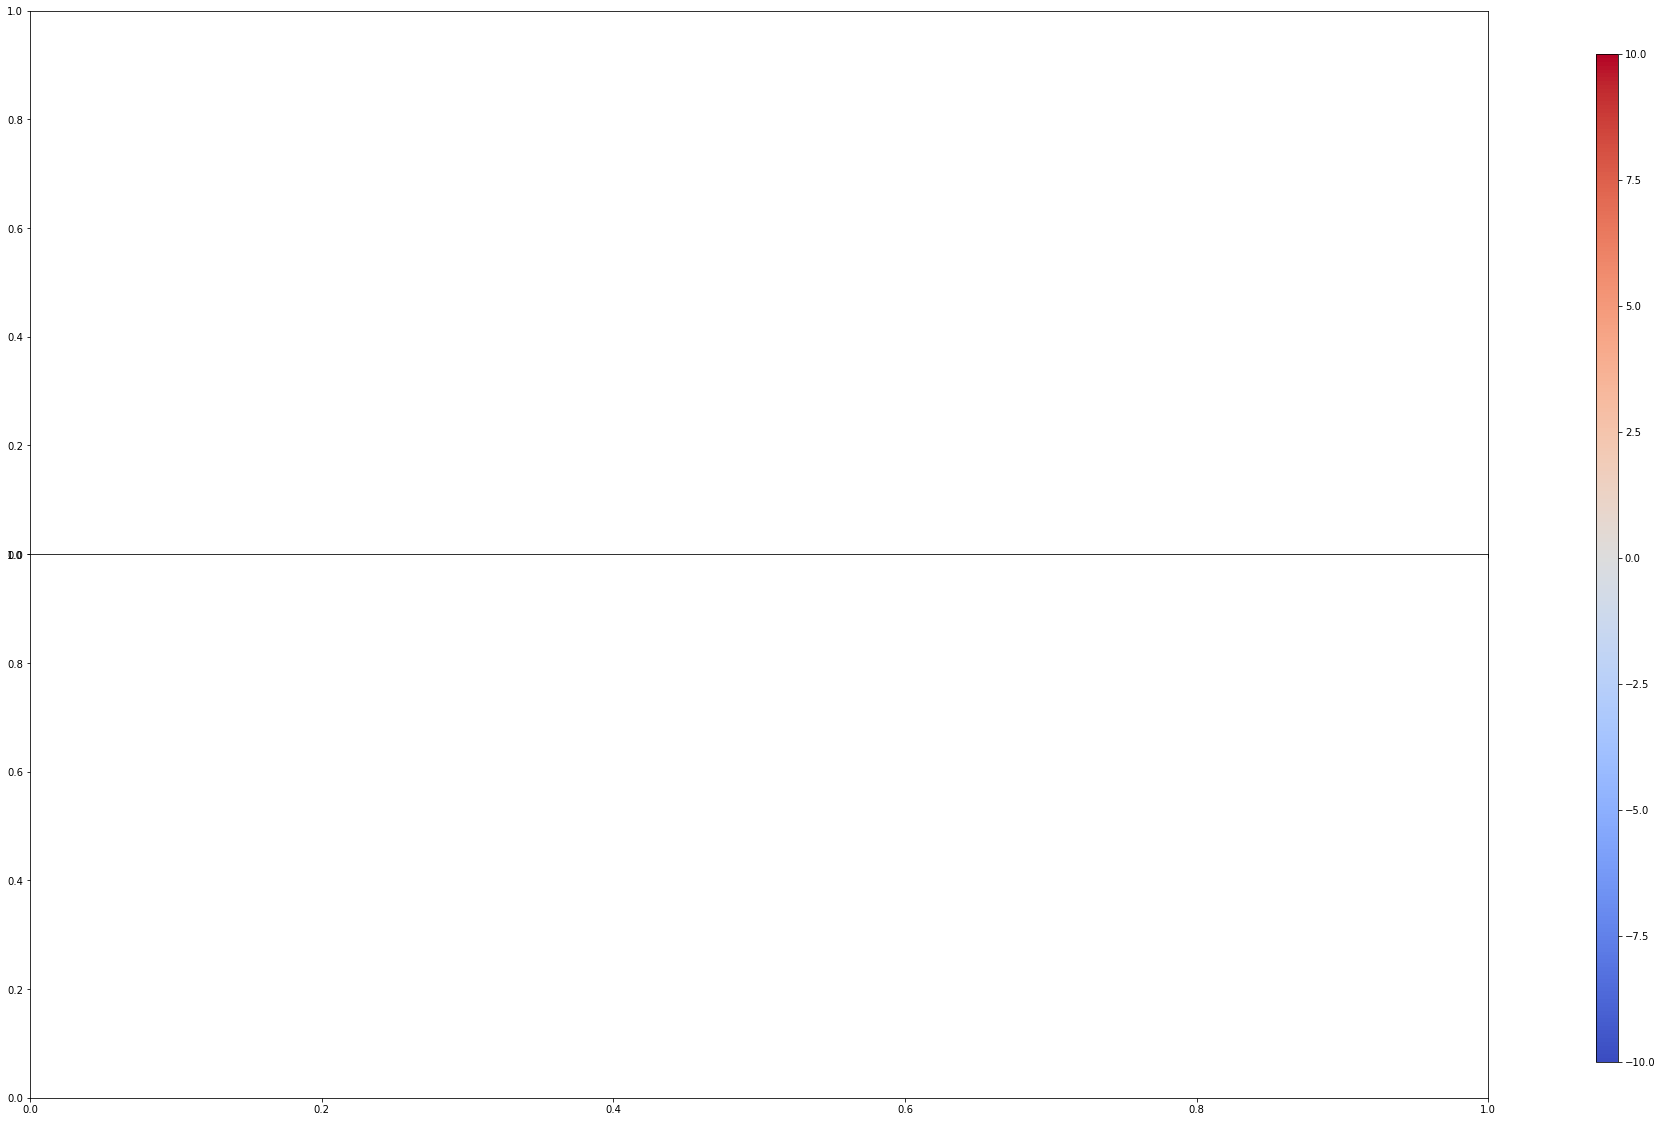

In [17]:
# Set parameters

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as mc
import matplotlib.colorbar as cb


# Data for plotting
t = np.unique(ds_map.time_daily)
Y = 'error_ERA'
frames = len(t)
# init the figure
#fig,[[ax1,cax1],[ax2,cax2]] = plt.subplots(2,2, gridspec_kw={"width_ratios":[50,1]},figsize=(30, 20))
fig,[ax1,ax2] = plt.subplots(nrows=2, sharex=True,figsize=(30, 20))
fig.subplots_adjust(right=0.8,wspace=0, hspace=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])



cmap = plt.cm.coolwarm
norm = mc.Normalize(vmin=-10, vmax=10)

cb1 = cb.ColorbarBase(cbar_ax, cmap=cmap,
                                 norm=norm,
                                 orientation='vertical')

# cb2 = cb.ColorbarBase(cax2, cmap=cmap,
#                                  norm=norm,
#                                  orientation='vertical')


# def update(i):
#     # clear the axis each frame
#     ax.clear()
    
 
    
#     #Get the data
#     ti=t[i]
#     condition = f"time_daily == '{ti}'"
#     ds = ds_map.query(condition)
    
#     x = ds.longitude_ERA
#     y = ds.latitude_ERA
#     z = ds[Y]
        
    
#     # replot things
#     sc = ax.scatter(x, y,
#                s=1,
#                c=cmap(norm(z)),
#                linewidths=1, alpha=.7
#                )
 

#     ax.set_title(str(ti) +' '+ Y)

# print('Animating')
# #ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
# #print('Saving')
# #ani.save('test.mp4')